In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cab_df = pd.read_csv('Cab_Data.csv')
city_df = pd.read_csv('City.csv')
cust_df = pd.read_csv('Customer_ID.csv')
trans_df = pd.read_csv('Transaction_ID.csv')

In [3]:
cab_df.head()
cab_df.shape

(359392, 7)

In [4]:
city_df
city_df['City'].nunique()

20

In [5]:
cust_df
cust_df.shape

(49171, 4)

In [6]:
trans_df.head()
trans_df.shape

(440098, 3)

In [7]:
cab_df['City'].nunique()

19

In [8]:
city_df.nunique()

City          20
Population    20
Users         20
dtype: int64

In [9]:
cab_df.shape

(359392, 7)

In [10]:
cab_df["Date of Travel"] = pd.to_datetime(cab_df['Date of Travel'], origin='1899-12-30', unit='D')

In [11]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [12]:
inner_joined = pd.merge(cab_df,trans_df,on= 'Transaction ID', how='inner')
data = pd.merge(inner_joined, cust_df, on = 'Customer ID', how='inner')
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


## General Checking

In [13]:
data.shape

(359392, 12)

In [14]:
# The date with the most rides
data.groupby('Date of Travel')['Transaction ID'].count().sort_values(ascending = False)
# data.groupby('Date of Travel')['Transaction ID'].count().max()

Date of Travel
2018-01-05    2022
2017-12-15    1123
2017-12-08    1100
2018-12-15    1086
2017-11-24    1085
              ... 
2016-01-19      88
2016-01-12      86
2016-01-11      85
2016-01-05      47
2016-01-04      25
Name: Transaction ID, Length: 1095, dtype: int64

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

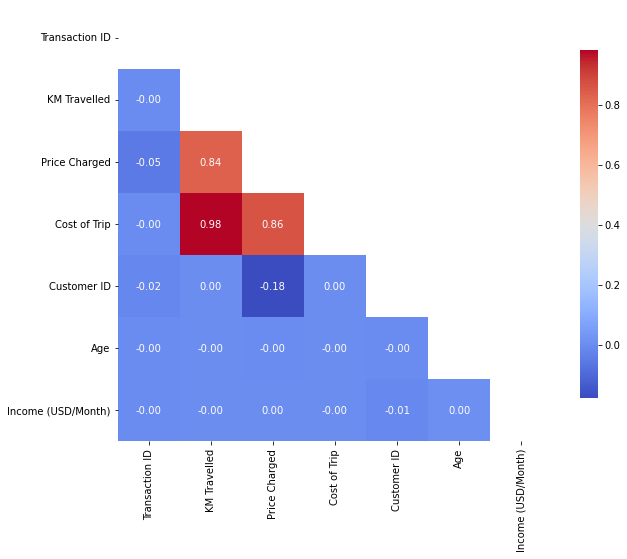

In [15]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap with the mask
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

In [16]:
df = data.groupby(['Company','Date of Travel'])['Transaction ID'].count().sort_values(ascending = False)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Customer ID,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
Age,359392.0,3.533670e+01,12.594234,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00


In [18]:
data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [20]:
data['year'] =0
data['year'] = data["Date of Travel"].apply(lambda x: x.year)

In [21]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2016
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2018
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,2016
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,2018


<AxesSubplot:xlabel='year', ylabel='count'>

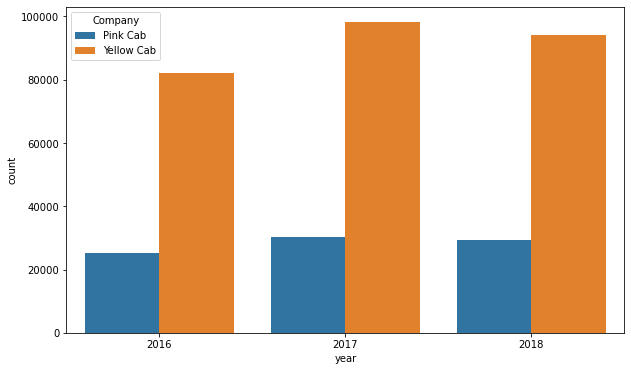

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='year', hue='Company')
## As the chart shows, the Yellow Cab is more prominent than the others

Text(0, 0.5, 'Number of Transactions')

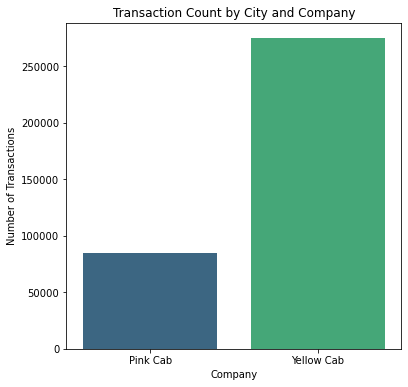

In [23]:
plt.figure(figsize=(6, 6))
sns.barplot(data= data.groupby('Company')['Transaction ID'].count().reset_index(), x='Company',y='Transaction ID'
           , palette ='viridis')
#plt.xticks(rotation=90)

# Add title and labels
plt.title('Transaction Count by City and Company')
plt.xlabel('Company')
plt.ylabel('Number of Transactions')

Text(0, 0.5, 'Number of Transactions')

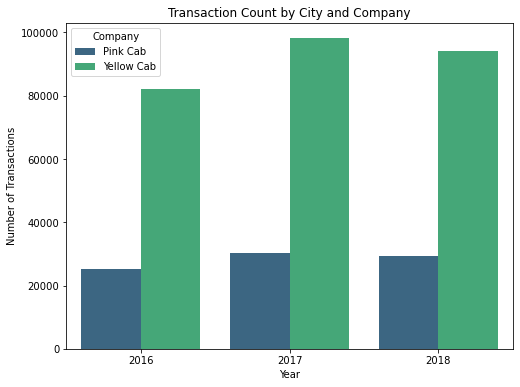

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(data= data.groupby(['year','Company'])['Transaction ID'].count().reset_index(), x='year',y='Transaction ID', hue='Company'
           , palette ='viridis')
#plt.xticks(rotation=90)

# Add title and labels
plt.title('Transaction Count by City and Company')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')

Text(0, 0.5, 'Number of Transactions')

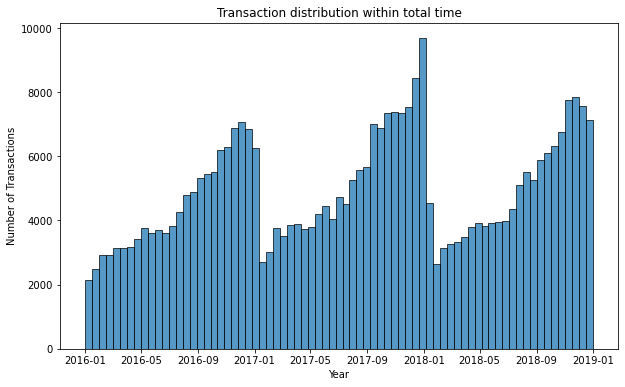

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Date of Travel")
plt.title('Transaction distribution within total time')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
# Customer usage of cab services peaks from the end of the year to the beginning of the new year


<AxesSubplot:xlabel='Date of Travel', ylabel='Transaction ID'>

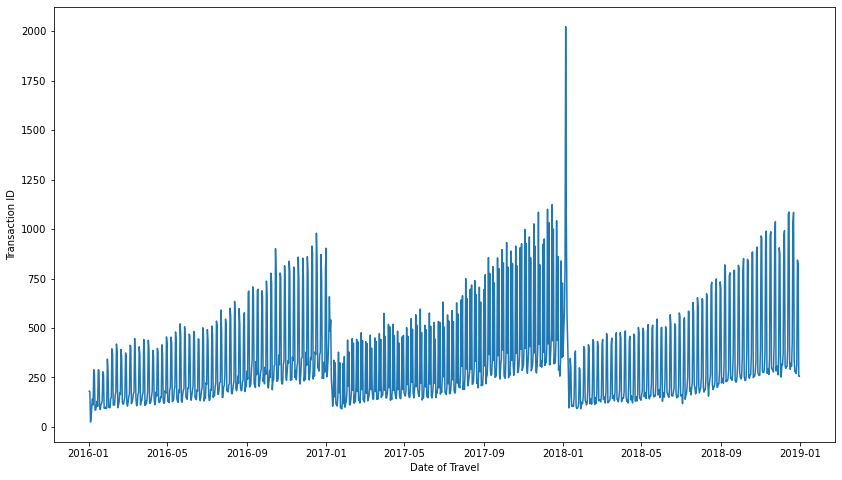

In [26]:
# Using line chart for more details
plt.figure(figsize=(14, 8))
sns.lineplot(data= data.groupby('Date of Travel').count(), x= 'Date of Travel', y = 'Transaction ID')

## Number of Rides by Company

Text(0, 0.5, 'Number of Transactions')

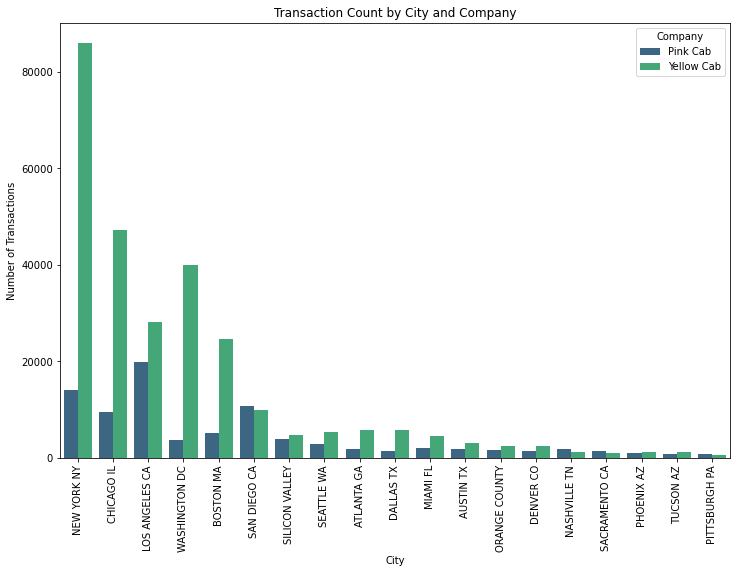

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data= data.groupby(['City','Company'])['Transaction ID'].count().reset_index(), x='City',y='Transaction ID', hue='Company'
           , order = data.groupby('City')['Transaction ID'].count().sort_values(ascending=False).index, palette ='viridis')
plt.xticks(rotation=90)

# Add title and labels
plt.title('Transaction Count by City and Company')
plt.xlabel('City')
plt.ylabel('Number of Transactions')


## Revenue and Profit

In [28]:
data.groupby(['year','Company'])['Price Charged'].sum().reset_index()

,year,Company,Price Charged
0,2016,Pink Cab,7908479.23
1,2016,Yellow Cab,38481133.18
2,2017,Pink Cab,9578629.54
3,2017,Yellow Cab,45818910.04
4,2018,Pink Cab,8841142.56
5,2018,Yellow Cab,41553843.97


Text(0, 0.5, 'Revenue')

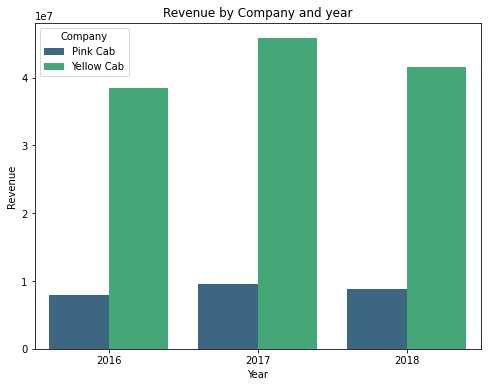

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(data = data.groupby(['year','Company'])['Price Charged'].sum().reset_index(), x='year', y ='Price Charged', hue='Company',palette='viridis')

plt.title('Revenue by Company and year')
plt.xlabel('Year')
plt.ylabel('Revenue')

<AxesSubplot:xlabel='Company', ylabel='Price Charged'>

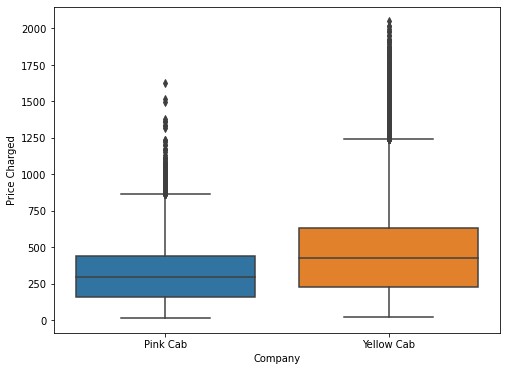

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data = data, x='Company', y ='Price Charged')

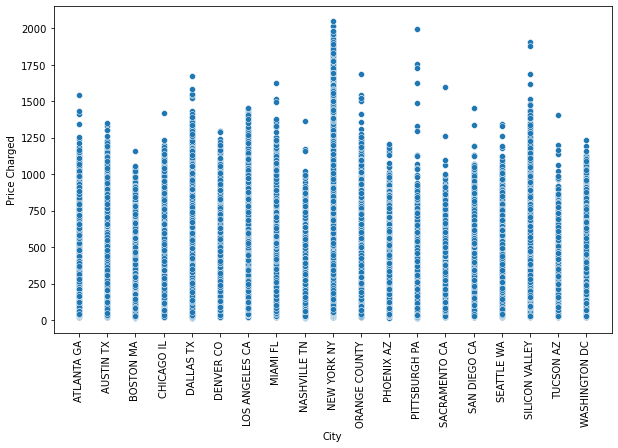

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = data, x='City', y='Price Charged')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Number of Rides')

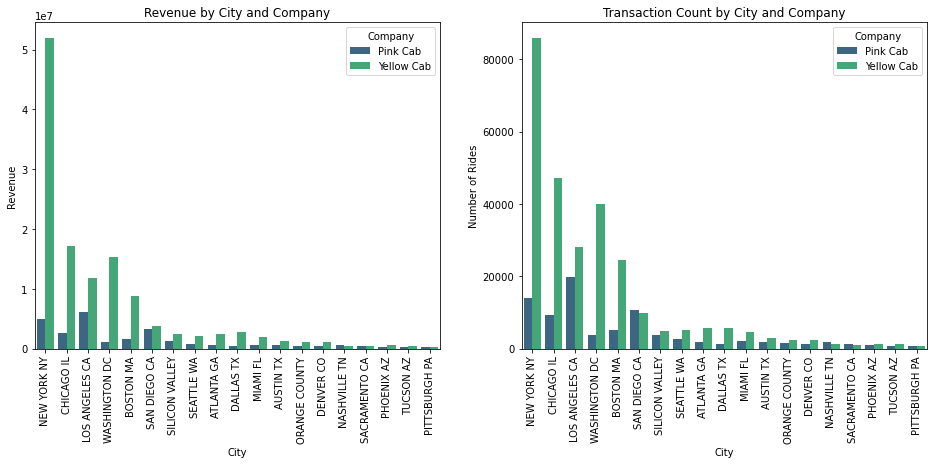

In [32]:
fig, ax = plt.subplots(1,2, figsize= (16,6))
#plt.figure(figsize=(12, 8))
sns.barplot(data= data.groupby(['City','Company'])['Price Charged'].sum().reset_index(), x='City', y='Price Charged', hue='Company'
           , order = data.groupby('City')['Price Charged'].count().sort_values(ascending=False).index, palette ='viridis', ax=ax[0])
ax[0].tick_params(axis='x' ,rotation=90)

# Add title and labels
ax[0].set_title('Revenue by City and Company')
ax[0].set_xlabel('City')
ax[0].set_ylabel('Revenue')

sns.barplot(data= data.groupby(['City','Company'])['Transaction ID'].count().reset_index(), x='City',y='Transaction ID', hue='Company'
           , order = data.groupby('City')['Transaction ID'].count().sort_values(ascending=False).index, palette ='viridis', ax=ax[1])
ax[1].tick_params(axis='x' ,rotation=90)

# Add title and labels
ax[1].set_title('Transaction Count by City and Company')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Number of Rides')

# The Revenue by the City and Company. The most number of rides and cause the most revennue is in the New York City, 
# and the revenue is corresponding to the Number of Rides (There is no exception such as less rides but more revenue).
# The Yellow cab seem to be extremely popular the the other, especially in New York City, Chicago, Washington DC and Boston. However there are 4 city that the Pink Cab is dominant: 
# San Diego, Nashville, Sacramento, Pittsburgh

In [33]:
data['Profit']= data['Price Charged'] - data['Cost of Trip']
df = data.groupby(['Company', 'year'])[['Price Charged', 'Profit']].sum().round(2).rename(columns={'Price Charged': 'Revenue'})
df

Revenue       Profit
Company    year                          
Pink Cab   2016   7908479.23   1713511.22
           2017   9578629.54   2033654.91
           2018   8841142.56   1560162.19
Yellow Cab 2016  38481133.18  13926995.43
           2017  45818910.04  16575977.97
           2018  41553843.97  13517399.77

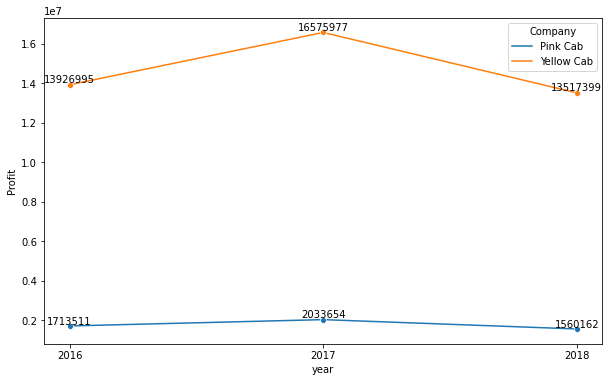

In [34]:
plt.figure(figsize=(10,6))
lineplot = sns.lineplot(data = data.groupby(['year','Company'])['Profit'].sum().reset_index(), x='year', y='Profit', hue='Company', marker='o')
lineplot.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels to the points (Profit values)
for line in lineplot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_value, y_value, f'{int(y_value)}', ha='center', va='bottom')

# Show the plot
plt.show()

<AxesSubplot:xlabel='year', ylabel='Profit'>

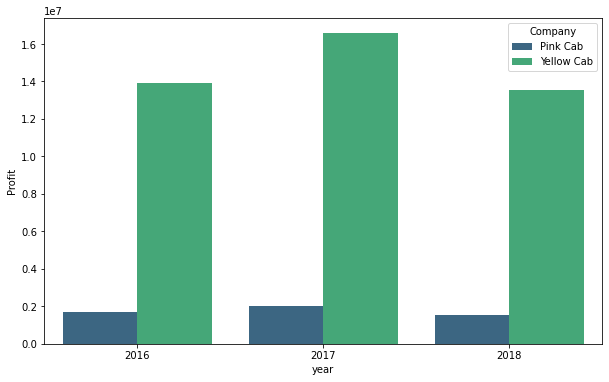

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data = data.groupby(['year','Company'])['Profit'].sum().reset_index(), x='year', y='Profit', hue='Company', palette ='viridis')

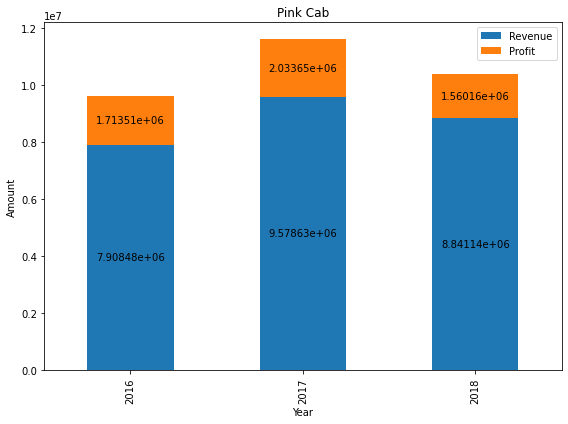

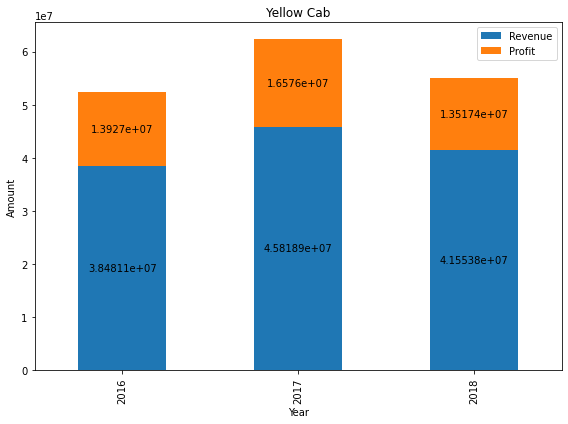

In [36]:
# Group by 'Company' and 'year', sum the values, and rename the column
df = data.groupby(['Company', 'year'])[['Price Charged', 'Profit']].sum().rename(columns={'Price Charged': 'Revenue'})

# Iterate over each company and create individual plots
companies = df.index.get_level_values('Company').unique()

for company in companies:
    company_df = df.xs(company, level='Company')  # Select data for each company

    # Create stacked bar chart
    ax = company_df.plot(kind='bar', stacked=True, title=company, figsize=(8, 6))
    
    # Add annotations for revenue and profit
    for i in ax.containers:
        ax.bar_label(i, label_type='center')

    plt.ylabel('Amount')
    plt.xlabel('Year')
    plt.tight_layout()
    plt.show()

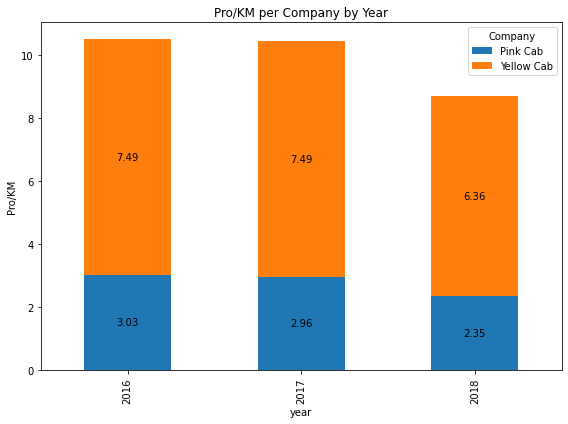

In [37]:
data['Pro/KM'] = data['Profit']/data['KM Travelled']
df_pro = data.groupby(['year','Company'])['Pro/KM'].mean().round(2).reset_index()
pivot_df = df_pro.pivot_table(index='year', columns='Company', values='Pro/KM', fill_value=0)
# Plot the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels to each stack
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add the labels in the center of each stack

# Show plot
plt.ylabel('Pro/KM')
plt.title('Pro/KM per Company by Year')
plt.tight_layout()
plt.show()

## Gender Impact

In [38]:
data.groupby(['Company','Gender'])['Transaction ID'].count()

Company     Gender
Pink Cab    Female     37480
            Male       47231
Yellow Cab  Female    116000
            Male      158681
Name: Transaction ID, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Transaction ID'>

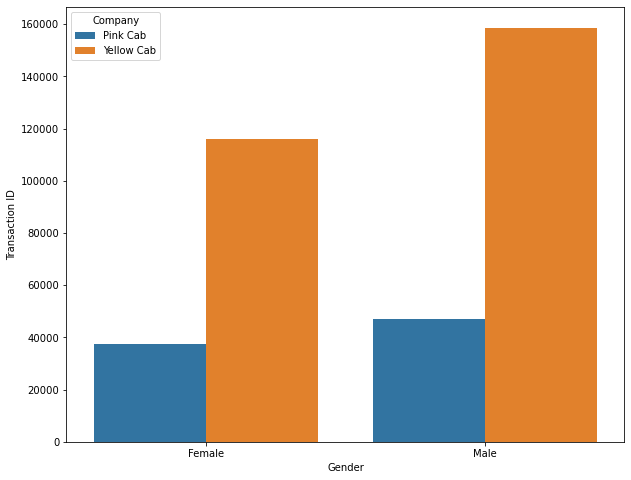

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(data =data.groupby(['Gender','Company'])['Transaction ID'].count().reset_index(), x='Gender', y='Transaction ID', hue = 'Company')

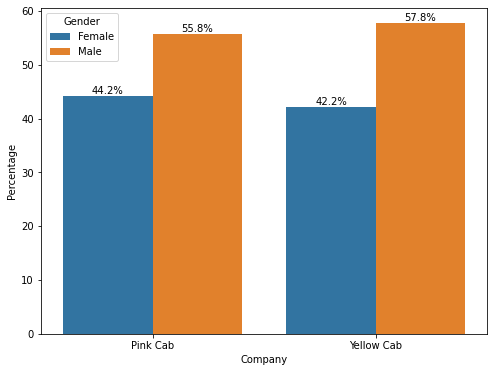

In [40]:
plt.figure(figsize=(8,6))
# Step 1: 
count_data = data.groupby(['Company', 'Gender'])['Transaction ID'].count().reset_index()

# Step 2: Calculate the total transactions for each company
total_transactions = count_data.groupby('Company')['Transaction ID'].transform('sum')

# Step 3: Compute the percentage
count_data['Percentage'] = (count_data['Transaction ID'] / total_transactions) * 100
barplot =sns.barplot(data =count_data, x='Company', y='Percentage', hue ='Gender')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%')
plt.show()

# It can be observed that the male group uses cab services more frequently than the female group.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


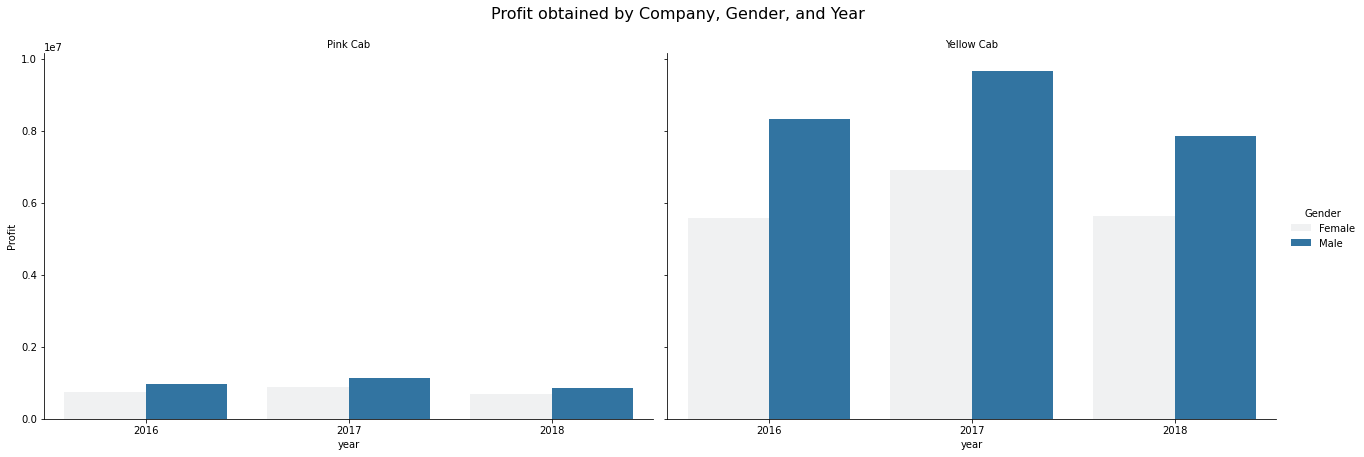

In [41]:
grouped_data = data.groupby(['year','Company','Gender'])['Profit'].sum().reset_index()
g = sns.FacetGrid(grouped_data, col='Company', height=6, aspect=1.5)
g.map(sns.barplot, 'year', 'Profit', 'Gender')
g.set_titles(col_template="{col_name}")  # Set titles for each subplot
g.set_axis_labels("year", "Profit")
g.add_legend(title='Gender')
g.fig.suptitle('Profit obtained by Company, Gender, and Year', fontsize=16, y=1.05)  # Adjust title position
plt.show()
# There is a significant difference between the two genders in Yellow Cab, with males generating more profit than females.

## Profit by age group

<AxesSubplot:xlabel='Age', ylabel='Count'>

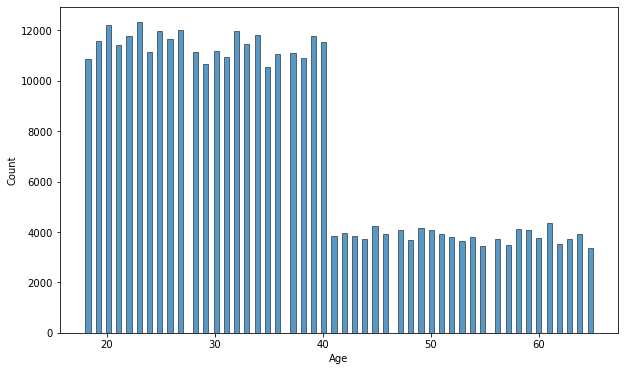

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Age')
# Check the distribution of Age

In [43]:
data['age_group']= data['Age'].apply(lambda age: '<20' if age < 20 else
                                    '20-40' if 20 < age <40 else
                                    '40-60' if 40< age <60 else
                                    '>60')
data['age_group'].value_counts()

20-40    216936
40-60     73568
>60       46451
<20       22437
Name: age_group, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


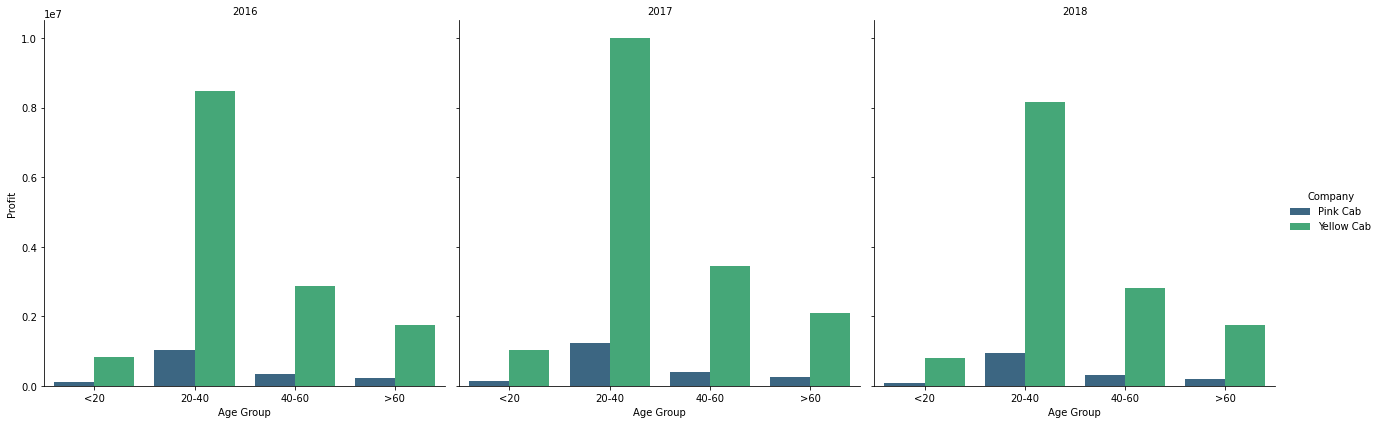

In [44]:
pro_group = data.groupby(['Company', 'year', 'age_group'])['Profit'].sum().reset_index()
age_groups_order =['<20','20-40','40-60','>60']
# Create a FacetGrid for the barplot
g = sns.FacetGrid(pro_group, col='year', height=6, aspect=1)
g.map(sns.barplot, 'age_group', 'Profit', 'Company', order = age_groups_order,palette='viridis')
g.set_titles(col_template="{col_name}")  # Set titles for each subplot
g.set_axis_labels("Age Group", "Profit")
g.add_legend(title='Company')

# Show the plot
plt.show()

## Identify the most popular dates for using cab services.

<Figure size 720x432 with 0 Axes>

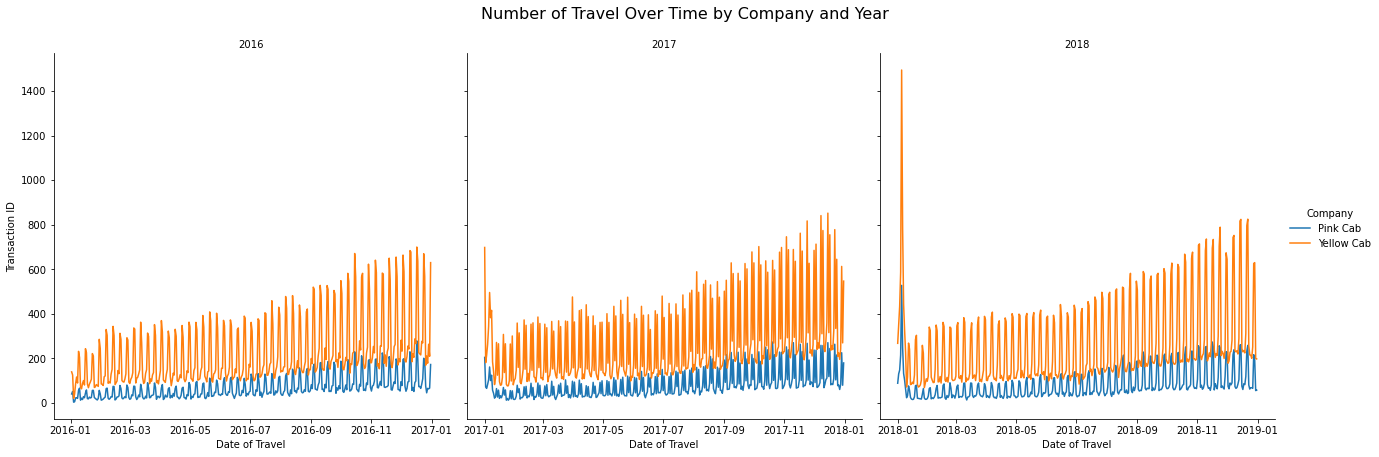

In [45]:
plt.figure(figsize=(10,6))
g=sns.FacetGrid(data = data.groupby(['Date of Travel','year','Company']).count().reset_index(), col = 'year', height =6, aspect= 1, sharex=False)
# Set `sharex=False` to allow individual x-axes for each year
g.map(sns.lineplot, 'Date of Travel', 'Transaction ID', 'Company')
g.set_titles(col_template="{col_name}")  # Set titles for each subplot
g.set_axis_labels("Date of Travel", "Transaction ID")
g.add_legend(title='Company')
g.fig.suptitle('Number of Travel Over Time by Company and Year', fontsize=16, y=1.05)  # Adjust title position

plt.show()

## Customer

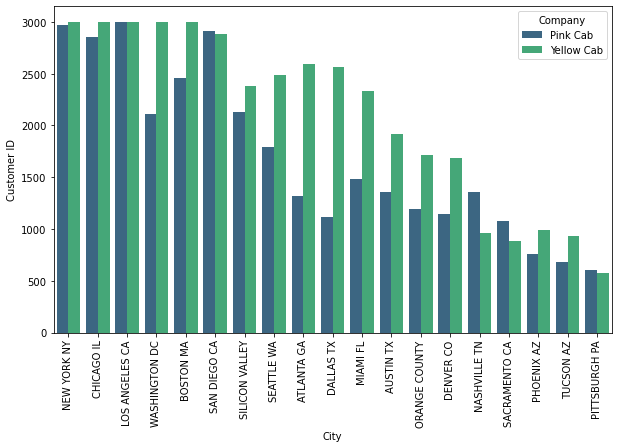

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data= data.groupby(['City','Company'])['Customer ID'].nunique().reset_index(),
            order = data.groupby('City')['Transaction ID'].count().sort_values(ascending=False).index,
            x='City', y='Customer ID', hue='Company', palette='viridis')
plt.xticks(rotation =90)
plt.show()

## Income

<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Count'>

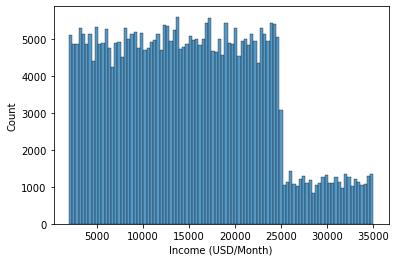

In [47]:
sns.histplot(data = data, x='Income (USD/Month)')

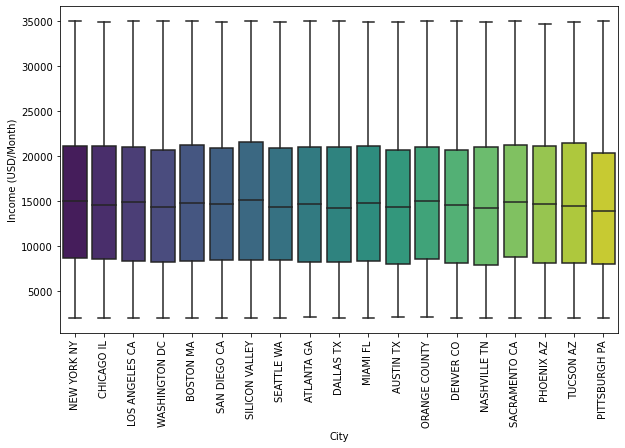

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data= data, x='City', y='Income (USD/Month)',
            order = data.groupby('City')['Transaction ID'].count().sort_values(ascending=False).index, palette ='viridis')
plt.xticks(rotation = 90)
plt.show()

In [49]:
data['Income_group']= data['Income (USD/Month)'].apply(lambda x: 'low' if x<2500 else
                                                      'middle' if 2500<x<10000 else
                                                      'High' if 10000<x<25000 else
                                                      'Wealthy')
data['Income_group'].value_counts()

High       213773
middle     105663
Wealthy     32965
low          6991
Name: Income_group, dtype: int64

In [50]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year,Profit,Pro/KM,age_group,Income_group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2016,57.3150,1.882266,20-40,High
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2018,281.2772,10.739870,20-40,High
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2018,194.6480,4.574571,20-40,High
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,2016,23.6660,0.826904,20-40,middle
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,2018,253.9808,6.981330,20-40,middle


<AxesSubplot:xlabel='Company', ylabel='Profit'>

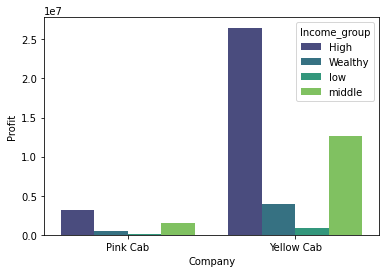

In [51]:
sns.barplot(data=data.groupby(['Company','Income_group'])['Profit'].sum().reset_index(), x='Company', y='Profit', hue='Income_group', palette ='viridis')

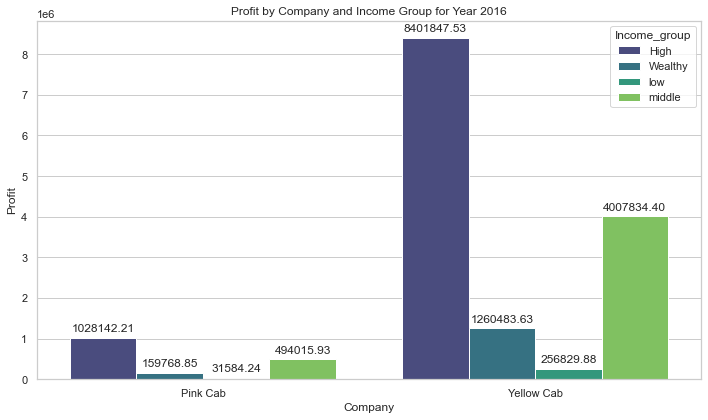

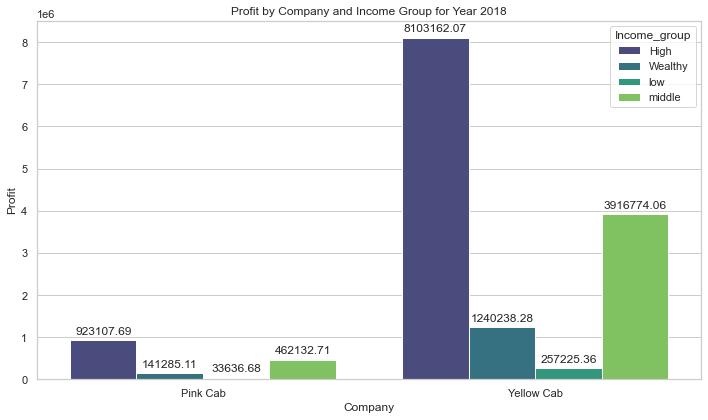

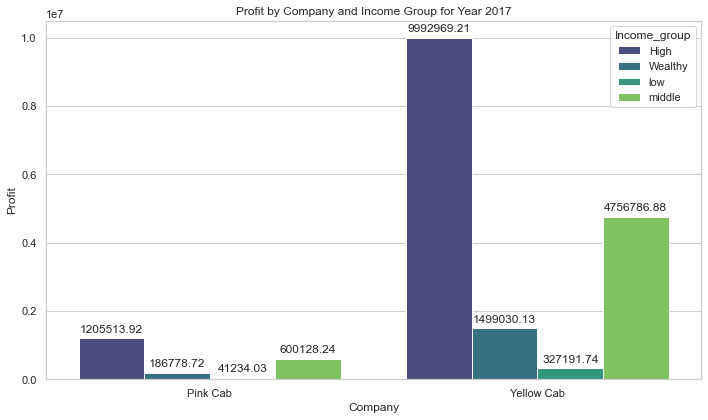

In [52]:
years = data['year'].unique()
sns.set(style="whitegrid")

# Loop over each year and plot separately
for year in years:
    # Filter data for the specific year
    data_year = data[data['year'] == year]
    
    # Group and prepare data for plotting
    grouped_data = data_year.groupby(['Company', 'Income_group'])['Profit'].sum().reset_index()
    
    # Create barplot for the specific year
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='Company', y='Profit', hue='Income_group', palette='viridis')
    
    # Add annotations (profit amounts) to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9),  # Adjust position
                    textcoords='offset points')
    
    # Set title and labels
    plt.title(f'Profit by Company and Income Group for Year {year}')
    plt.xlabel('Company')
    plt.ylabel('Profit')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

## Other Analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


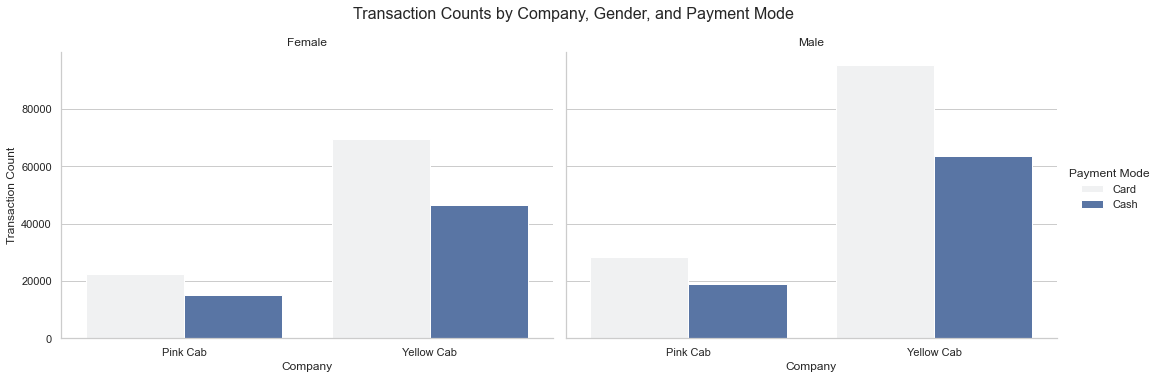

In [53]:
# Grouping and counting Transaction IDs
grouped_data = data.groupby(['Company', 'Payment_Mode', 'Gender'])['Transaction ID'].count().reset_index()

# Creating a FacetGrid
g = sns.FacetGrid(grouped_data, col='Gender', height=5, aspect=1.5)
g.map(sns.barplot, 'Company', 'Transaction ID', 'Payment_Mode', order=grouped_data['Company'].unique())
g.set_titles(col_template="{col_name}")  # Set titles for each subplot
g.set_axis_labels("Company", "Transaction Count")
g.add_legend(title='Payment Mode')
g.fig.suptitle('Transaction Counts by Company, Gender, and Payment Mode', fontsize=16, y=1.05)  # Adjust title position

plt.show()

In [54]:
df2 = data.groupby(['Company','year'])[['Price Charged','KM Travelled']].sum().reset_index()

In [55]:
df2['Price/KM'] = df2['Price Charged']/df2['KM Travelled']
df2

,Company,year,Price Charged,KM Travelled,Price/KM
0,Pink Cab,2016,7908479.23,563509.67,14.034327
1,Pink Cab,2017,9578629.54,685823.52,13.966610
2,Pink Cab,2018,8841142.56,661739.92,13.360449
3,Yellow Cab,2016,38481133.18,1859978.21,20.689024
4,Yellow Cab,2017,45818910.04,2214879.02,20.686868
5,Yellow Cab,2018,41553843.97,2124560.24,19.558798


## Hypothesis tests

### Hypothesis 1

- H0: There is no difference between the profits of males and females
- H1: alternative

In [56]:
from scipy import stats

Yell_males_prof = data[(data['Company']=="Yellow Cab")& (data['Gender']=="Male")]['Profit']
Yell_fema_prof = data[(data['Company']=="Yellow Cab")& (data['Gender']=="Female")]['Profit']

t_statistic, p_value = stats.ttest_ind(Yell_males_prof, Yell_fema_prof, equal_var=False)
print(f'yellow t_stat: {t_statistic}')
print(f'yellow p-value: {p_value}')

Pink_males_prof = data[(data['Company']=="Pink Cab")& (data['Gender']=="Male")]['Profit']
Pink_fema_prof = data[(data['Company']=="Pink Cab")& (data['Gender']=="Female")]['Profit']

t_statistic, p_value = stats.ttest_ind(Pink_males_prof, Pink_fema_prof, equal_var=False)
print(f'pink t_stat: {t_statistic}')
print(f'pink p-value: {p_value}')

yellow t_stat: 10.37503739501431
yellow p-value: 3.2583323717893763e-25
pink t_stat: 1.5760762050772872
pink p-value: 0.11501217119514037


### Hypothesis 2
- H0: Age-group has no effect on profit
- H1: Age-group has effect on profit

In [57]:
from scipy import stats

In [58]:
yellow_data = data[data['Company']=="Yellow Cab"]
grouped_data = yellow_data.groupby('age_group')['Profit'].apply(list)
f_statistic, p_value = stats.f_oneway(*grouped_data)
print(f"f_stat: {f_statistic}")
print(f"p_value: {p_value}")

f_stat: 7.520495874122722
p_value: 4.985984600296644e-05


In [59]:
pink_data = data[data['Company']=="Pink Cab"]
grouped_data = pink_data.groupby('age_group')['Profit'].apply(list)
f_statistic, p_value = stats.f_oneway(*grouped_data)
print(f"f_stat: {f_statistic}")
print(f"p_value: {p_value}")

f_stat: 0.6541844725069808
p_value: 0.5802174820952017


### Hypothesis 3
- H0: Payment Mode has no effect on Company profit
- H1: Payment Mode has effect on Company profit

In [60]:
from scipy import stats

Yell_card_prof = data[(data['Company']=="Yellow Cab")& (data['Payment_Mode']=="Card")]['Profit']
Yell_cash_prof = data[(data['Company']=="Yellow Cab")& (data['Payment_Mode']=="Cash")]['Profit']

t_statistic, p_value = stats.ttest_ind(Yell_card_prof, Yell_cash_prof, equal_var=False)
print(f'yellow t_stat: {t_statistic}')
print(f'yellow p-value: {p_value}')

Pink_card_prof = data[(data['Company']=="Pink Cab")& (data['Payment_Mode']=="Card")]['Profit']
Pink_cash_prof = data[(data['Company']=="Pink Cab")& (data['Payment_Mode']=="Cash")]['Profit']

t_statistic, p_value = stats.ttest_ind(Pink_card_prof, Pink_cash_prof, equal_var=False)
print(f'pink t_stat: {t_statistic}')
print(f'pink p-value: {p_value}')

yellow t_stat: -1.049402391138175
yellow p-value: 0.29399404036970817
pink t_stat: 0.2660986911387631
pink p-value: 0.7901639572170616


In [61]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year,Profit,Pro/KM,age_group,Income_group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2016,57.3150,1.882266,20-40,High
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2018,281.2772,10.739870,20-40,High
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2018,194.6480,4.574571,20-40,High
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,2016,23.6660,0.826904,20-40,middle
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,2018,253.9808,6.981330,20-40,middle


In [62]:
Yell_males_prof = data[(data['Company'] == "Yellow") & (data['Gender'] == "Male")]['Profit']
Yell_males_prof

Series([], Name: Profit, dtype: float64)

In [63]:
Pink_males_prof = data[(data['Company']=="Pink")| (data['Gender']=="Male")]['Profit']
Pink_fema_prof = data[(data['Company']=="Pink")| (data['Gender']=="Female")]['Profit']

t_statistic, p_value = stats.ttest_ind(Pink_males_prof, Pink_fema_prof, equal_var=False)
print(f'pink: {t_statistic}')
print(f'pink: {p_value}')

pink: 12.779628685726617
pink: 2.173838984880027e-37


# Recommendation

## After evaluating, analyzing and visualizing data, It appears to expose these insights and recommendation:
### Let's put yourseld on the shoes of an investor who wants to invest in the cab firm, We will consider the following information:
**Focus on Yellow Cab Operations**:

- The Yellow Cab are more prominent and dominant in the market compared to Pink Cab, The customer tended to use Yellow services. Therefore, it's essential to delve deeper into Yellow Cab's operation to extract meaningful insights and understand the factors driving its success.

**Profit Generation Concentrated in Key Cities**:

- Yellow Cab generates significantly more profit than Pink Cab, particularly in large cities such as New York, Washington DC, Chicago, and Los Angeles. These cities represent high-demand areas for cab services, and Yellow Cab's strong presence here is a key profit driver. Analyzing Yellow Cab’s market strategy and operational efficiency in these cities will be critical to sustaining and expanding profits.

**Price Trends and Market Strategy**:

- As The table shows that the "price charged" for each company are quite different and tended to decline since 2016,  reflecting a competitive effort to attract more customers with lower prices. Although Pink Cab offered lower average price per Kilometer travelled, its transactions volume was still substantial lower than the Yellow Cab. It’s important to investigate whether Yellow Cab’s premium pricing is tied to its superior service quality and brand loyalty.

**Service Quality as a Key Differentiator**:

- Despite of similar customer volumes, Yellow Cab generated much higher profits, indicating that it has uncovered a formula which will sastify the customer, perhaps came from the good services include: employee attitudes, cleaner and more well-maintained vehicles, the faster services or other convenient..etc.

**Customer Demographics and Profit Generation**:

- The age groups influence: There are significant differences between these groups, The 20-40 group contributed the most to both Companies, followed by '40-60' group. Younger and older age group ('<20' and '>60') are less profitable. This suggests that targeting working-age individuals, who are frequent cab users, with tailored services and marketing could drive further growth.

**Gender Preferences**:

- Males tended to use Cab sevices, especially with the Yellow Cab. Males gained more profit than females, but the difference is extreme distance between two company. The gender gap is notably wider between the two companies, indicating that Yellow Cab has a stronger appeal to male customers. Understanding and leveraging this demographic difference could enhance targeted marketing strategies.

**Income-Based Customer Segments**:

- Both of the cabs attracted the large amount number of customers in the medium and high-income segments. This indicates that customers are willing to pay for the convenience and comfort provided by these cab services for their purposes.
    
**Seasonal Demand Pattern**:

- Cab usage peaked during the period from the end of year to the beginning of the next, aligning with holidays and vacation periods. This suggests an opportunity for both companies to capitalize on increased demand through targeted promotions or enhanced services during this time.